In [1]:
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("..")
from config import *
from sklearn.linear_model import LinearRegression
import math
from scipy.optimize import curve_fit

In [2]:
loaded_node_temp= pd.read_pickle(Dict_temp_5)
loaded_nodes_loc=pd.read_pickle(Nodes_loc_5)
loaded_node_temp.keys()



dict_keys([0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0, 1.02, 1.04, 1.06, 1.08, 1.1, 1.12, 1.14, 1.16, 1.18, 1.2, 1.22, 1.24, 1.26, 1.28, 1.3, 1.32, 1.34, 1.36, 1.38, 1.4, 1.42, 1.44, 1.46, 1.48, 1.5, 1.52, 1.54, 1.56, 1.58, 1.6, 1.62, 1.64, 1.66, 1.68, 1.7, 1.72, 1.74, 1.76, 1.78, 1.8, 1.82, 1.84, 1.86, 1.88, 1.9, 1.92, 1.94, 1.96, 1.98, 2.0, 2.02, 2.04, 2.06, 2.08, 2.1, 2.12, 2.14, 2.16, 2.18, 2.2, 2.22, 2.24, 2.26, 2.28, 2.3, 2.32, 2.34, 2.36, 2.38, 2.4, 2.42, 2.44, 2.46, 2.48, 2.5, 2.52, 2.54, 2.56, 2.58, 2.6, 2.62, 2.64, 2.66, 2.68, 2.7, 2.72, 2.74, 2.76, 2.78, 2.8, 2.82, 2.84, 2.86, 2.88, 2.9, 2.92, 2.94, 2.96, 2.98, 3.0, 3.02, 3.04, 3.06, 3.08, 3.1, 3.12, 3.14, 3.16, 3.18, 3.2, 3.22, 3.24, 3.26, 3.28, 3.3, 3.32, 3.34, 3.36, 3.38, 3.4, 3.4

In [3]:
#loaded_node_temp.keys()

In [4]:
temperature =[]
# Using a loop
for key in loaded_node_temp:
    if len(loaded_node_temp[key]) >= 100:  # Make sure the list has at least 2 elements
        temperature .append(loaded_node_temp[key][2])

print(temperature )


[25.0007, 25.0017, 25.0031, 25.0047, 25.0066, 25.0087, 25.0111, 25.0138, 25.0166, 25.0198, 25.0231, 25.0267, 25.0306, 25.0347, 25.039, 25.0435, 25.0484, 25.0534, 25.0587, 25.0642, 25.07, 25.076, 25.0823, 25.0888, 25.0956, 25.1012, 25.1064, 25.1111, 25.1155, 25.1197, 25.1236, 25.1273, 25.1307, 25.1339, 25.1368, 25.1395, 25.1419, 25.1441, 25.1461, 25.1478, 25.1493, 25.1505, 25.1515, 25.1522, 25.1528, 25.153, 25.153, 25.1528, 25.1524, 25.1517, 25.152, 25.1529, 25.1542, 25.1559, 25.1577, 25.1599, 25.1623, 25.1649, 25.1678, 25.1709, 25.1742, 25.1778, 25.1817, 25.1858, 25.1901, 25.1947, 25.1995, 25.2045, 25.2098, 25.2154, 25.2211, 25.2272, 25.2334, 25.2399, 25.2467, 25.2524, 25.2575, 25.2622, 25.2667, 25.2708, 25.2747, 25.2784, 25.2818, 25.285, 25.2879, 25.2906, 25.293, 25.2952, 25.2972, 25.2989, 25.3004, 25.3016, 25.3026, 25.3034, 25.3039, 25.3041, 25.3042, 25.3039, 25.3035, 25.3028, 25.3031, 25.3041, 25.3054, 25.307, 25.3089, 25.311, 25.3134, 25.316, 25.3189, 25.322, 25.3254, 25.329, 25.33

In [5]:
time = list(loaded_node_temp.keys())

Fitted 'a' coefficient: 25.00909521962394
Fitted 'b' coefficient: 0.15118244362625607


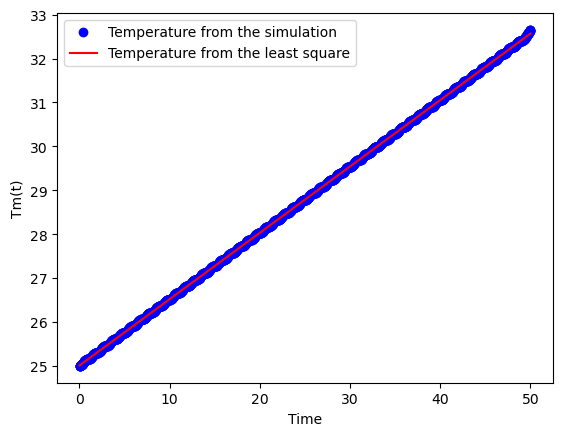

In [6]:
# Define the function Tm(t) = a + bt + ∑∆Tn cos(nωt + ϕn) for n = 1, 3, 5, 7
def tm_function(t, a, b, *params):
    result = a + b * t
    num_terms = len(params) // 2  # Since each term has both ∆Tn and ϕn
    for n in range(1, num_terms + 1):
        delta_Tn = params[2*n - 2]
        phi_n = params[2*n - 1]
        result += delta_Tn * np.cos(n * omega * t + phi_n)
        
    return result


time= np.array(time)

# Initial guess for parameters
initial_guess = [1.0, 1.0] + [0.0, 0.0, 0.0, 0.0]  # [a, b, ∆T1, ϕ1, ∆T3, ϕ3, ∆T5, ϕ5, ∆T7, ϕ7]

# Angular frequency
omega = 2 * np.pi*0.182

# Perform the curve fitting
popt, _ = curve_fit(tm_function, time, temperature, p0=initial_guess)


a_fit = popt[0]
b_fit = popt[1]

print("Fitted 'a' coefficient:", a_fit)
print("Fitted 'b' coefficient:", b_fit)

# Generate fitted curve using the fitted coefficients
fitted_curve = tm_function(time, *popt)


plt.plot(time, temperature, 'bo', label='Temperature from the simulation')
plt.plot(time, fitted_curve, 'r-', label='Temperature from the least square')
plt.xlabel('Time')
plt.ylabel('Tm(t)')
plt.legend()
plt.show()


In [7]:
popt

array([ 2.50090952e+01,  1.51182444e-01,  7.63271528e-04, -7.27303143e-01,
        8.11863660e-04, -7.50339168e+00])

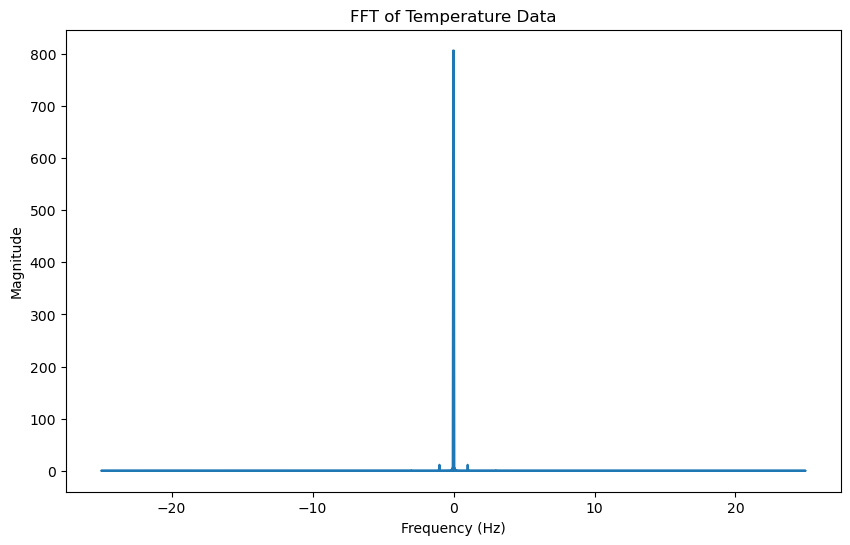

In [8]:
 import numpy as np
import matplotlib.pyplot as plt

# Assuming you have time series data as follows:
# t = np.array([...])  # Your time points
# temperature = np.array([...])  # Your temperature data points

# You would typically subtract the mean of the data to remove the DC component
temperature_detrended = temperature - np.mean(temperature)
# Apply windowing function
window = np.blackman(len(temperature_detrended))
windowed_signal = temperature_detrended * window

# Perform the FFT on windowed signal
fft_result = np.fft.fft(windowed_signal)

frequencies = np.fft.fftfreq(len(time), np.mean(np.diff(time)))  # Assuming uniform spacing in time points

# Plot the magnitude spectrum
plt.figure(figsize=(10,6))
plt.plot(frequencies, np.abs(fft_result))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of Temperature Data')
plt.show()

In [9]:
np.abs(fft_result)

array([3.87059912e-01, 8.06066385e+02, 3.40961816e+02, ...,
       1.57481879e+00, 3.40961816e+02, 8.06066385e+02])

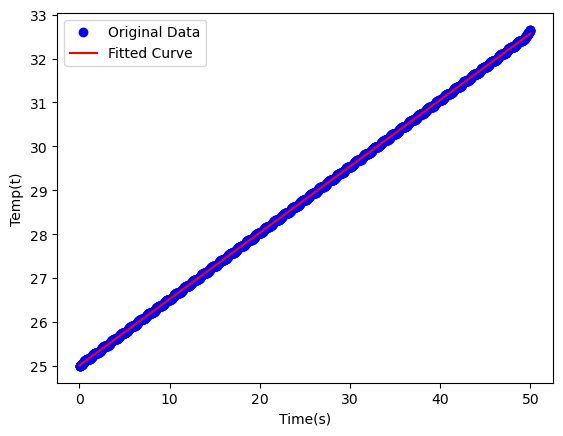

In [10]:
new_node_temperature =[]
# Using a loop
for key in loaded_node_temp:
    if len(loaded_node_temp[key]) >= 100:  
        new_node_temperature.append(loaded_node_temp[key][4])

plt.plot(time, new_node_temperature, 'bo', label='Original Data')
plt.plot(time,  fitted_curve, 'r-', label='Fitted Curve')
plt.xlabel('Time(s)')
plt.ylabel('Temp(t)')
plt.legend()
plt.show()

In [11]:
Error= abs((temperature- fitted_curve)/temperature)

In [12]:
np.mean(Error)*100

0.050437067430158036

In [13]:
#0∘=∑𝑡sin(2𝜋𝜔𝑡+3𝜋2)∗𝑇(𝑡),
(1)
#90∘=∑𝑡cos(2𝜋𝜔𝑡+3𝜋2)∗𝑇(𝑡).
# https://www.mdpi.com/2076-3417/13/7/4094
#https://www.sciencedirect.com/science/article/abs/pii/S0026271410003550

1